First 5 rows of the simulated credit risk dataset:
        Age  AnnualIncome  CreditScore  LoanAmount  DebtToIncome  \
0 -4.896894     -0.312627     2.230777   -4.277583     -2.436902   
1 -4.040055      0.641930     1.498284   -3.522500     -0.954567   
2  0.028915     -3.197543    -0.504179    0.266693      1.064445   
3  0.054758     -1.633551    -3.646173    0.808431      1.634177   
4 -0.776409     -1.954607     0.188886   -0.562531      3.660838   

   YearsWithBank  CreditLines  EmploymentYears   Savings  Default  
0       1.605514    -0.530409       -10.989439 -0.761442        0  
1       2.266197    -0.656859        -8.377213  0.005016        0  
2      -0.977429     2.630623         4.564260  1.631395        1  
3       1.169522    -0.510762         3.020543 -1.681500        1  
4      -1.873682     0.066019         3.746021 -0.772364        1  

Descriptive Statistics:
               Age  AnnualIncome  CreditScore   LoanAmount  DebtToIncome  \
count  1500.000000   1500.00000

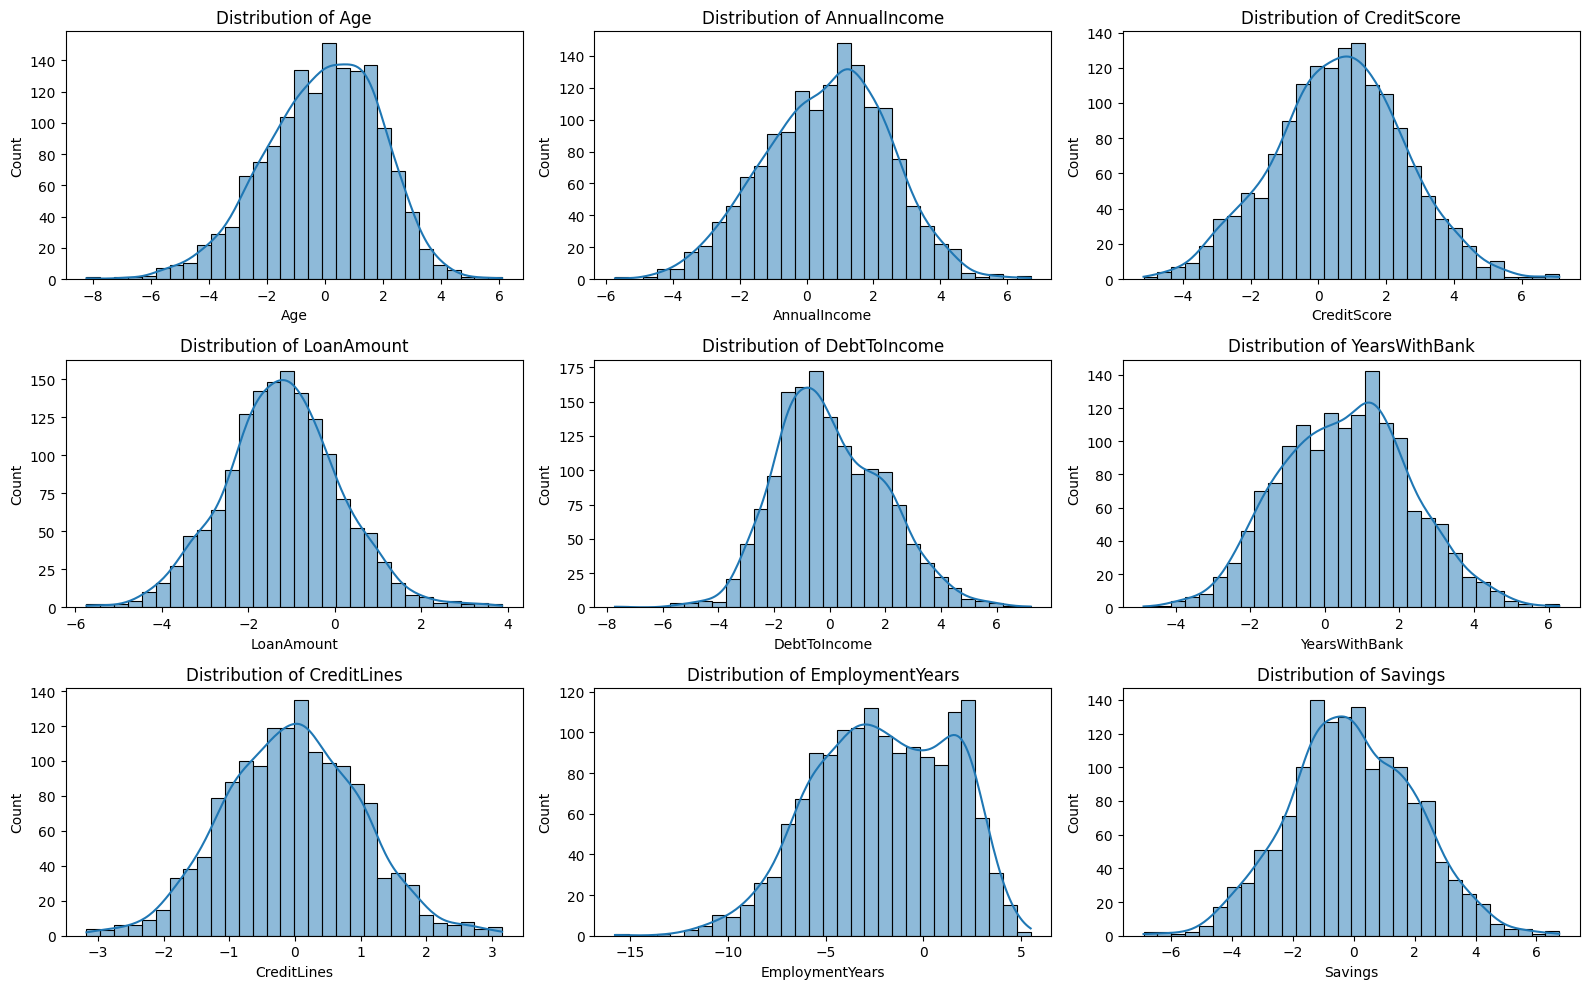

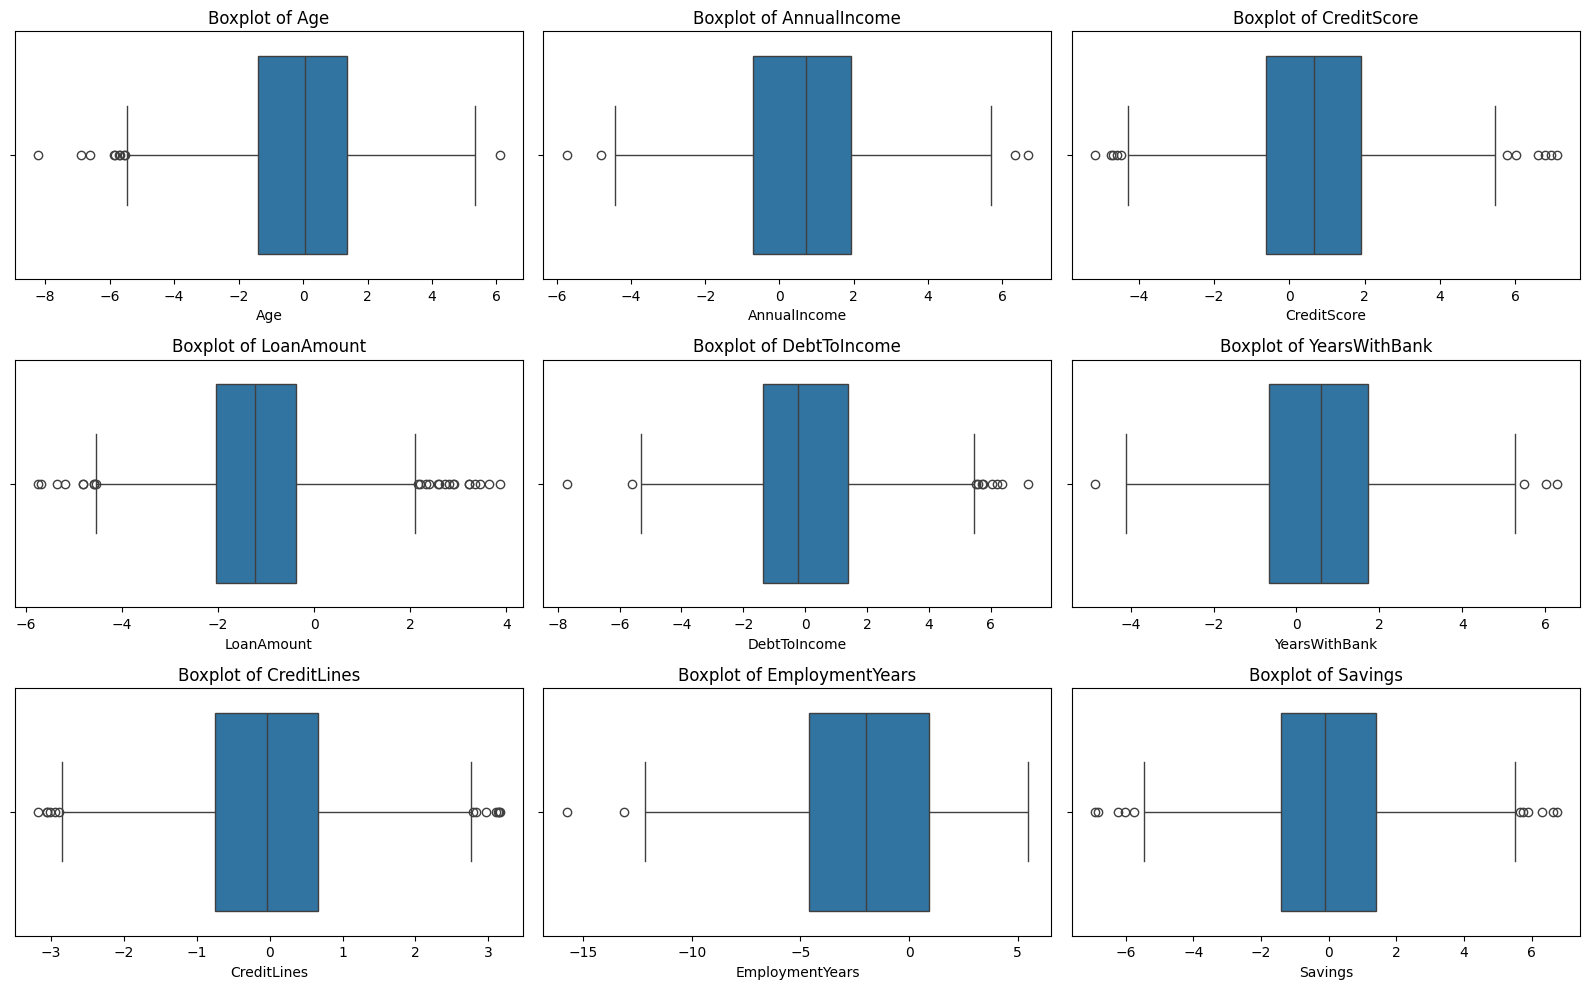

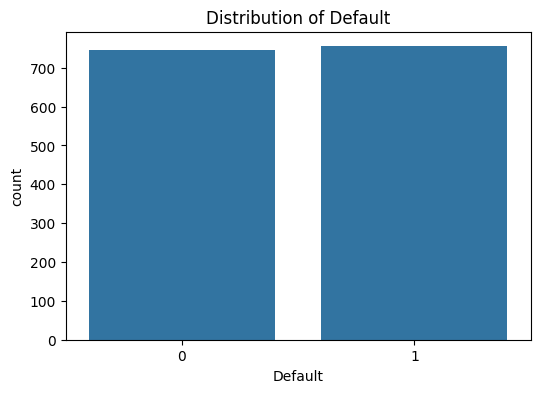

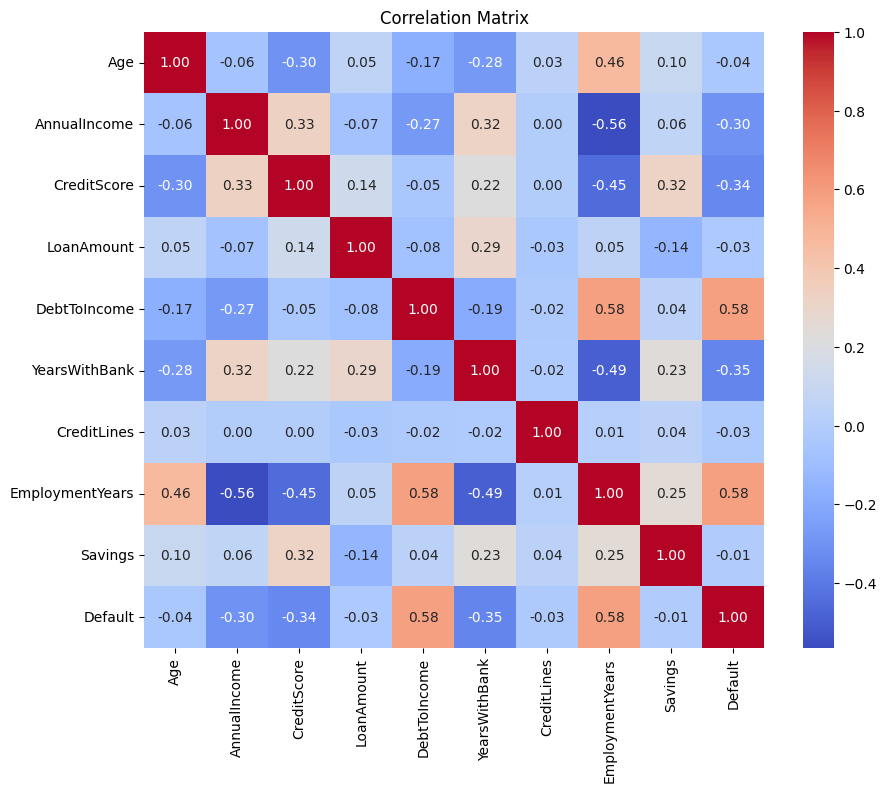


Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}

Decision Tree Classifier Evaluation:
Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       224
           1       0.87      0.86      0.87       226

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450

Confusion Matrix:
 [[196  28]
 [ 32 194]]


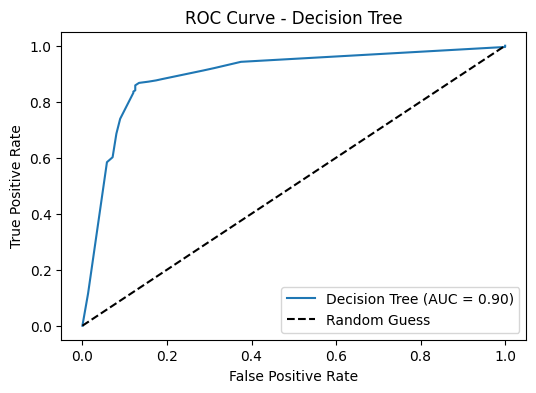

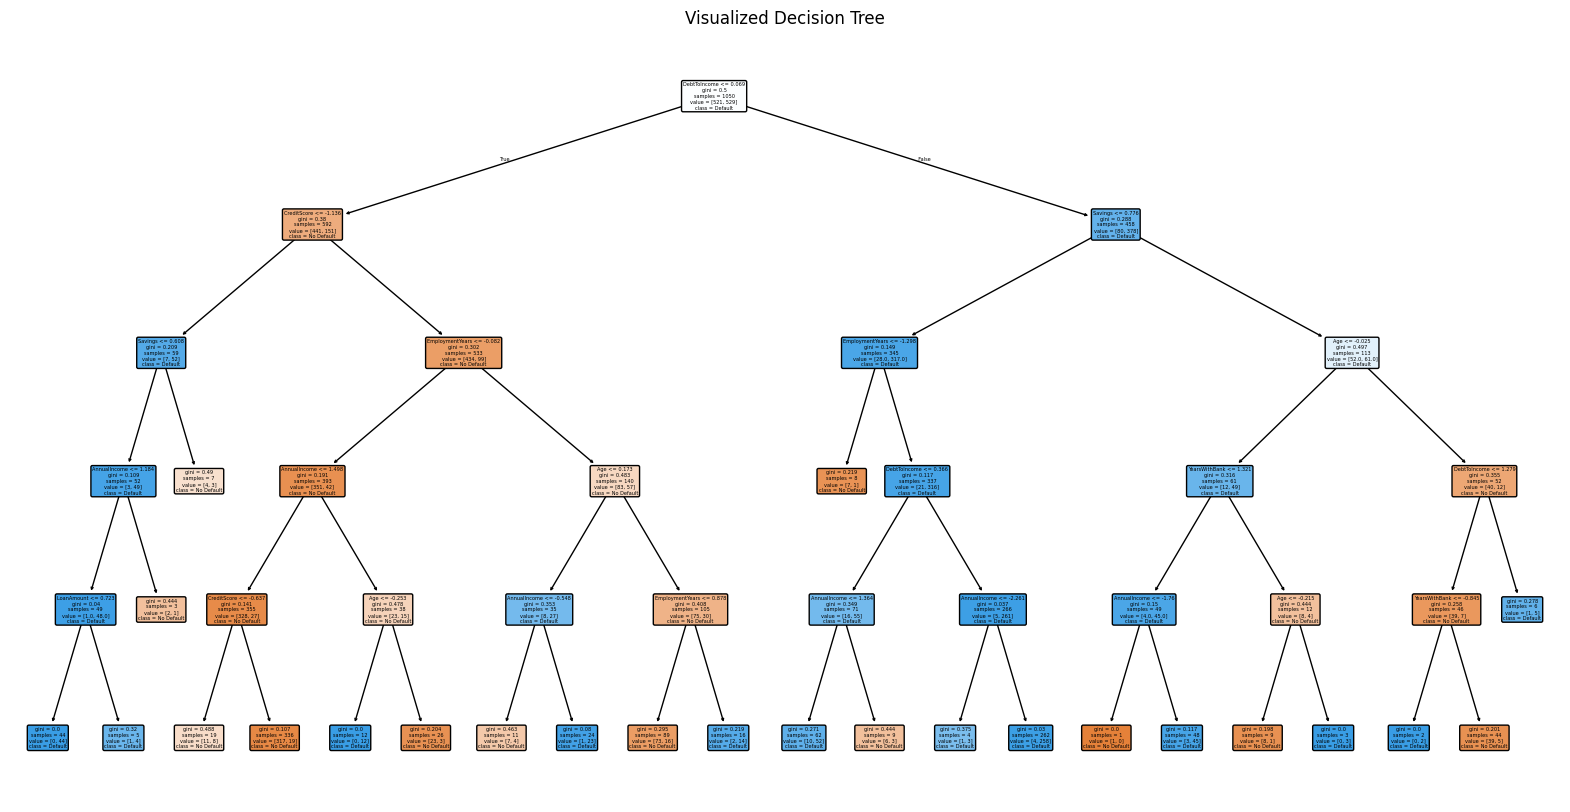


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest Classifier Evaluation:
Accuracy: 0.9088888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       224
           1       0.91      0.91      0.91       226

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450

Confusion Matrix:
 [[204  20]
 [ 21 205]]


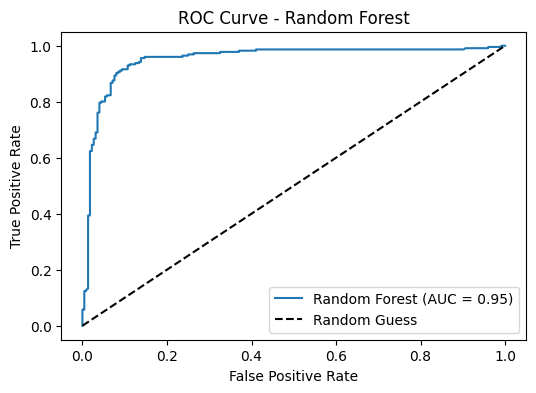


Decision Tree 5-fold CV Accuracy: [0.82       0.87333333 0.86666667 0.83       0.82666667]
Random Forest 5-fold CV Accuracy: [0.91666667 0.92       0.93333333 0.92666667 0.89      ]

Feature Importances from Random Forest:
1. DebtToIncome: 0.2550
2. EmploymentYears: 0.1947
3. CreditScore: 0.1209
4. Age: 0.1001
5. Savings: 0.0916
6. YearsWithBank: 0.0873
7. AnnualIncome: 0.0824
8. LoanAmount: 0.0400
9. CreditLines: 0.0280


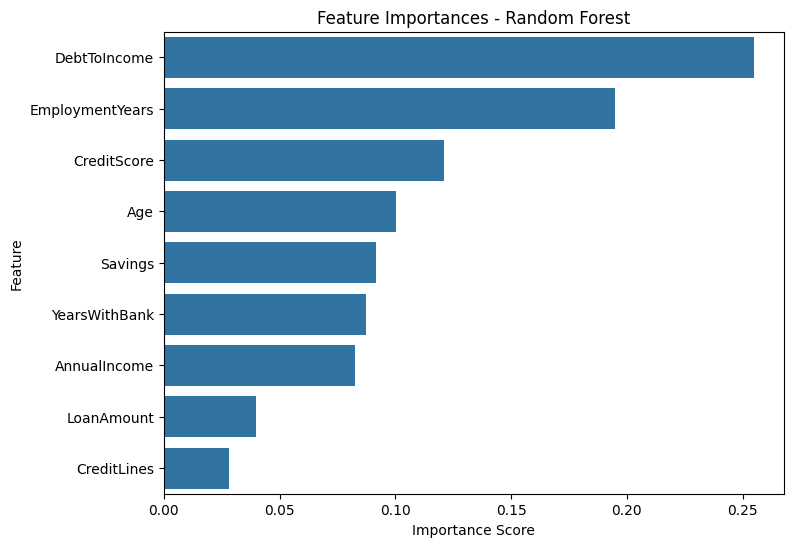

In [1]:
# =============================================================================
# Title: Extensive Credit Risk Analysis using Decision Trees & Random Forests
#
# Aim:
#   To predict customer default risk using advanced data analysis and ensemble
#   learning techniques.
#
# Scope:
#   - Generate a synthetic dataset representing customers' financial and
#     demographic attributes relevant to credit risk.
#   - Conduct an extensive exploratory data analysis (EDA) including summary
#     statistics, distribution plots, and correlation analysis.
#   - Preprocess the data using feature scaling.
#   - Build and evaluate a Decision Tree classifier and a Random Forest classifier.
#   - Perform hyperparameter tuning using GridSearchCV.
#   - Validate the models using cross-validation and assess performance through
#     accuracy, confusion matrices, classification reports, and ROC curves.
#   - Analyze feature importances to understand which factors most influence default risk.
#
# Hypotheses:
#   1. Customer attributes such as income, credit score, and debt-to-income ratio
#      significantly influence the probability of default.
#   2. A Random Forest model, by aggregating multiple trees, will perform better
#      than a single Decision Tree in predicting default risk.
#
# Methodology:
#   - Data Simulation: Create a synthetic dataset using scikit-learn's make_classification.
#   - EDA: Use descriptive statistics, histograms, box plots, and correlation heatmaps.
#   - Data Preprocessing: Apply standard scaling to features.
#   - Modeling: Train a Decision Tree and a Random Forest classifier.
#   - Hyperparameter Tuning: Optimize key parameters using GridSearchCV.
#   - Evaluation: Evaluate models with accuracy scores, confusion matrices, ROC curves,
#     and cross-validation.
#   - Interpretation: Discuss model outcomes and feature importance insights.
# =============================================================================

# ------------------------------
# 1. Importing Libraries
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn modules for data generation, preprocessing, model building, tuning, and evaluation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

# Ensure plots appear inline in Colab
%matplotlib inline

# ------------------------------
# 2. Data Simulation
# ------------------------------
# We simulate a dataset for credit risk analysis. Features mimic variables such as:
#   - Age, Annual Income, Credit Score, Loan Amount, Debt-to-Income Ratio,
#     Years with Bank, Number of Credit Lines, Employment Years, and Savings.
# The target variable 'Default' indicates if the customer defaulted (1) or not (0).

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset:
#   - n_samples: number of customers
#   - n_features: total features (here we use 9 features)
#   - n_informative: number of features with actual predictive power
#   - flip_y: noise level in the target labels
X, y = make_classification(n_samples=1500,
                           n_features=9,
                           n_informative=7,   # most features are informative
                           n_redundant=1,
                           n_repeated=0,
                           n_classes=2,
                           flip_y=0.04,       # 4% label noise
                           class_sep=1.2,     # separation between classes
                           random_state=42)

# Create a DataFrame with meaningful column names.
feature_names = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
                 'DebtToIncome', 'YearsWithBank', 'CreditLines', 'EmploymentYears', 'Savings']
df = pd.DataFrame(X, columns=feature_names)
df['Default'] = y

# Display the first few rows of the dataset.
print("First 5 rows of the simulated credit risk dataset:")
print(df.head())

# ------------------------------
# 3. Exploratory Data Analysis (EDA)
# ------------------------------
# a) Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# b) Histograms for each feature to observe distribution and potential outliers.
plt.figure(figsize=(16, 10))
for idx, col in enumerate(feature_names):
    plt.subplot(3, 3, idx+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# c) Boxplots to identify outliers.
plt.figure(figsize=(16, 10))
for idx, col in enumerate(feature_names):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# d) Count plot for the target variable to inspect class balance.
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=df)
plt.title("Distribution of Default")
plt.show()

# e) Correlation Analysis: Compute correlation matrix and visualize with a heatmap.
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ------------------------------
# 4. Data Preprocessing
# ------------------------------
# a) Feature Scaling: Standardizing features so they have a mean=0 and std=1.
# This is important for many machine learning models.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names])

# b) Update the DataFrame with scaled features (optional for interpretation)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled['Default'] = df['Default']

# ------------------------------
# 5. Train-Test Split
# ------------------------------
# Split the scaled features and target into training and test sets (70%-30% split).
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Default'],
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=df['Default'])

# ------------------------------
# 6. Modeling: Decision Tree Classifier
# ------------------------------
# a) Initialize a Decision Tree Classifier.
dtree = DecisionTreeClassifier(random_state=42)

# b) Hyperparameter Tuning using GridSearchCV:
#    We tune 'max_depth' and 'min_samples_split' to avoid overfitting.
param_grid_dt = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(estimator=dtree,
                       param_grid=param_grid_dt,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("\nBest parameters for Decision Tree:", grid_dt.best_params_)

# c) Use the best estimator from grid search for predictions.
best_dtree = grid_dt.best_estimator_
y_pred_dt = best_dtree.predict(X_test)

# d) Evaluation of Decision Tree:
print("\nDecision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# e) ROC Curve & AUC for Decision Tree:
y_prob_dt = best_dtree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()

# f) Visualize the Decision Tree structure.
plt.figure(figsize=(20, 10))
plot_tree(best_dtree, feature_names=feature_names, class_names=['No Default', 'Default'], filled=True, rounded=True)
plt.title("Visualized Decision Tree")
plt.show()

# ------------------------------
# 7. Modeling: Random Forest Classifier
# ------------------------------
# a) Initialize a Random Forest Classifier.
rf = RandomForestClassifier(random_state=42)

# b) Hyperparameter Tuning using GridSearchCV:
#    Tune parameters such as number of trees and maximum depth.
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("\nBest parameters for Random Forest:", grid_rf.best_params_)

# c) Use the best estimator from grid search for predictions.
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# d) Evaluation of Random Forest:
print("\nRandom Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# e) ROC Curve & AUC for Random Forest:
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

# ------------------------------
# 8. Cross-Validation Evaluation
# ------------------------------
# To assess model robustness, we perform 5-fold cross-validation on the best models.
cv_scores_dt = cross_val_score(best_dtree, X_scaled, df['Default'], cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(best_rf, X_scaled, df['Default'], cv=5, scoring='accuracy')
print("\nDecision Tree 5-fold CV Accuracy:", cv_scores_dt)
print("Random Forest 5-fold CV Accuracy:", cv_scores_rf)

# ------------------------------
# 9. Feature Importance Analysis
# ------------------------------
# Analyze which features most influence the predictions.
# For the Random Forest model:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importances from Random Forest:")
for i in range(len(feature_names)):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Visualize feature importances with a barplot.
plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# ------------------------------
# 10. Summary & Discussion
# ------------------------------
# In this extensive analysis, we:
#   - Simulated a synthetic credit risk dataset with 9 features.
#   - Conducted a thorough EDA including descriptive statistics, distribution plots,
#     boxplots for outlier detection, and a correlation heatmap.
#   - Preprocessed the data by applying standard scaling.
#   - Split the data into training and test sets.
#   - Built and tuned a Decision Tree classifier and a Random Forest classifier using GridSearchCV.
#   - Evaluated both models with accuracy, confusion matrices, ROC curves, and cross-validation.
#   - Analyzed feature importances to identify key drivers of customer default risk.
#
# Key takeaways:
#   - Financial and demographic features indeed play a crucial role in predicting default risk.
#   - The ensemble method (Random Forest) tends to provide improved performance by reducing
#     variance compared to a single Decision Tree.
#   - Hyperparameter tuning and cross-validation are essential steps in building robust models.
